In [12]:
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.applications.inception_v3 import preprocess_input as inception_preprocess_input

from keras.applications.xception import Xception,preprocess_input
from keras.applications.xception import preprocess_input as xception_preprocess_input

from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input


from keras.models import Sequential, Model,load_model
from keras.preprocessing import image




import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image
import glob



In [2]:
model_inception =load_model("../models/InceptionResNet_Finetuning/inceptionResNet_finetuning_train10.h5")

model_xception =load_model("../models/Xception/xception_finetuning_train10.h5")

model_vgg16 =load_model("../models/VGG_Finetuning/vgg16_finetuning_train10.h5")



In [13]:
img_width_xception_inception, img_height_xception_inception = 299, 299
img_width_vgg, img_height_vgg = 224, 224




In [14]:

def loadAllImage(img_name_list, preprocess_input,img_width,img_height):

  imageList = []
  for imgName in img_name_list:
    img = image.load_img(imgName, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = preprocess_input(x)
    imageList.append(x)
  return np.asarray(imageList)




In [114]:
dog_img_name_list = glob.glob('./' + "../original_data/dog" + '/*.' + "jpg") + glob.glob('./' + "../data/validation/dogs" + '/*.' + "jpg")
cat_img_name_list = glob.glob('./' + "../original_data/cat" + '/*.' + "jpg") + glob.glob('./' + "../data/validation/cats" + '/*.' + "jpg")


inception_dog_images = loadAllImage(dog_img_name_list, inception_preprocess_input,img_width_xception_inception,img_height_xception_inception)
inception_cat_images = loadAllImage(cat_img_name_list, inception_preprocess_input,img_width_xception_inception,img_height_xception_inception)

xception_dog_images = loadAllImage(dog_img_name_list, xception_preprocess_input,img_width_xception_inception,img_height_xception_inception)
xception_cat_images = loadAllImage(cat_img_name_list, xception_preprocess_input,img_width_xception_inception,img_height_xception_inception)

vgg_dog_images = loadAllImage(dog_img_name_list, vgg16_preprocess_input,img_width_vgg,img_height_vgg)
vgg_cat_images = loadAllImage(cat_img_name_list, vgg16_preprocess_input,img_width_vgg,img_height_vgg)



catLabels =  np.array([[0] for i in range(0,len(cat_img_name_list))])
dogLabels =  np.array([[1] for i in range(0,len(dog_img_name_list))])


In [19]:
imagesList = np.concatenate([inception_cat_images,inception_dog_images])
labelList = np.concatenate([catLabels,dogLabels])


print(model_inception.evaluate(imagesList, labelList, verbose=1))

500/500 [==============================] - 5s 10ms/step
[0.18186751067779722, 0.974]


In [115]:
inception_catPredictedList = []
for index in range(0,len(inception_cat_images)):
  predictedResult= model_inception.predict(np.array([inception_cat_images[index]]))
  inception_catPredictedList.append((predictedResult[0][0],cat_img_name_list[index]))


inception_dogPredictedList = []
for index in range(0,len(inception_dog_images)):
  predictedResult= model_inception.predict(np.array([inception_dog_images[index]]))
  inception_dogPredictedList.append((predictedResult[0][0],dog_img_name_list[index]))



In [116]:
xception_catPredictedList = []
for index in range(0,len(inception_cat_images)):
  predictedResult= model_xception.predict(np.array([xception_cat_images[index]]))
  xception_catPredictedList.append((predictedResult[0][0],cat_img_name_list[index]))


xception_dogPredictedList = []
for index in range(0,len(inception_dog_images)):
  predictedResult= model_xception.predict(np.array([xception_dog_images[index]]))
  xception_dogPredictedList.append((predictedResult[0][0],dog_img_name_list[index]))




In [117]:
vgg_catPredictedList = []
for index in range(0,len(inception_cat_images)):
  predictedResult= model_vgg16.predict(np.array([vgg_cat_images[index]]))
  vgg_catPredictedList.append((predictedResult[0][0],cat_img_name_list[index]))


vgg_dogPredictedList = []
for index in range(0,len(inception_dog_images)):
  predictedResult= model_vgg16.predict(np.array([vgg_dog_images[index]]))
  vgg_dogPredictedList.append((predictedResult[0][0],dog_img_name_list[index]))





In [118]:
dog_failed_dict = {}
cat_failed_dict = {}

In [119]:

for tmp in inception_catPredictedList:
    if tmp[0] > 0.5:
        print('{:.5f}'.format(float(tmp[0])) + "   " + tmp[1])
        if tmp[1] in cat_failed_dict:
            cat_failed_dict[tmp[1]].append(float(tmp[0]))
        else:
            cat_failed_dict[tmp[1]] = [float(tmp[0])]

        
print("-----------------------------")
for tmp in inception_dogPredictedList:
    if tmp[0] < 0.5:
        print('{:.5f}'.format(float(tmp[0])) + "   " + tmp[1])
        
        if tmp[1] in dog_failed_dict:
            dog_failed_dict[tmp[1]].append(float(tmp[0]))
        else:
            dog_failed_dict[tmp[1]] = [float(tmp[0])]


0.94329   ./../original_data/cat/102.jpg
0.72288   ./../original_data/cat/121.jpg
0.92792   ./../original_data/cat/207.jpg
1.00000   ./../original_data/cat/208.jpg
0.62288   ./../original_data/cat/222.jpg
0.58365   ./../original_data/cat/224.jpg
1.00000   ./../original_data/cat/255.jpg
1.00000   ./../original_data/cat/260.jpg
0.96210   ./../original_data/cat/264.jpg
1.00000   ./../original_data/cat/288.jpg
1.00000   ./../original_data/cat/302.jpg
0.89683   ./../data/validation/cats/cat.10029.jpg
0.99946   ./../data/validation/cats/cat.10121.jpg
0.65743   ./../data/validation/cats/cat.10129.jpg
0.76673   ./../data/validation/cats/cat.10145.jpg
0.97039   ./../data/validation/cats/cat.10196.jpg
1.00000   ./../data/validation/cats/cat.10266.jpg
0.99032   ./../data/validation/cats/cat.10270.jpg
0.63235   ./../data/validation/cats/cat.10365.jpg
0.77980   ./../data/validation/cats/cat.10441.jpg
0.88553   ./../data/validation/cats/cat.10636.jpg
0.99970   ./../data/validation/cats/cat.10864.jpg

In [120]:

for tmp in xception_catPredictedList:
    if tmp[0] > 0.5:
        print('{:.5f}'.format(float(tmp[0])) + "   " + tmp[1])
        if tmp[1] in cat_failed_dict:
            cat_failed_dict[tmp[1]].append(float(tmp[0]))
        else:
            cat_failed_dict[tmp[1]] = [float(tmp[0])]
        
print("-----------------------------")
for tmp in xception_dogPredictedList:
    if tmp[0] < 0.5:
        print('{:.5f}'.format(float(tmp[0])) + "   " + tmp[1])
        if tmp[1] in dog_failed_dict:
            dog_failed_dict[tmp[1]].append(float(tmp[0]))
        else:
            dog_failed_dict[tmp[1]] = [float(tmp[0])]



0.50095   ./../original_data/cat/108.jpg
0.93562   ./../original_data/cat/121.jpg
0.99848   ./../original_data/cat/207.jpg
0.92869   ./../original_data/cat/223.jpg
0.97295   ./../original_data/cat/232.jpg
1.00000   ./../original_data/cat/255.jpg
0.50713   ./../original_data/cat/260.jpg
0.71851   ./../original_data/cat/264.jpg
0.56669   ./../original_data/cat/70.jpg
0.62667   ./../data/validation/cats/cat.10129.jpg
0.67377   ./../data/validation/cats/cat.10145.jpg
1.00000   ./../data/validation/cats/cat.10266.jpg
0.91297   ./../data/validation/cats/cat.10270.jpg
0.63357   ./../data/validation/cats/cat.10587.jpg
0.74507   ./../data/validation/cats/cat.10610.jpg
1.00000   ./../data/validation/cats/cat.10625.jpg
0.89071   ./../data/validation/cats/cat.10740.jpg
0.89172   ./../data/validation/cats/cat.10775.jpg
0.99970   ./../data/validation/cats/cat.10863.jpg
0.60477   ./../data/validation/cats/cat.10946.jpg
-----------------------------
0.10897   ./../original_data/dog/138.jpg
0.10897   .

In [121]:

for tmp in vgg_catPredictedList:
    if tmp[0] > 0.5:
        print('{:.5f}'.format(float(tmp[0])) + "   " + tmp[1])
        if tmp[1] in cat_failed_dict:
            cat_failed_dict[tmp[1]].append(float(tmp[0]))
        else:
            cat_failed_dict[tmp[1]] = [float(tmp[0])]
            
print("-----------------------------")
for tmp in vgg_dogPredictedList:
    if tmp[0] < 0.5:
        print('{:.5f}'.format(float(tmp[0])) + "   " + tmp[1])
        if tmp[1] in dog_failed_dict:
            dog_failed_dict[tmp[1]].append(float(tmp[0]))
        else:
            dog_failed_dict[tmp[1]] = [float(tmp[0])]



0.99485   ./../original_data/cat/121.jpg
0.99971   ./../original_data/cat/147.jpg
0.99971   ./../original_data/cat/154.jpg
0.87113   ./../original_data/cat/163.jpg
1.00000   ./../original_data/cat/207.jpg
0.95964   ./../original_data/cat/208.jpg
1.00000   ./../original_data/cat/232.jpg
1.00000   ./../original_data/cat/255.jpg
1.00000   ./../original_data/cat/260.jpg
0.99956   ./../original_data/cat/288.jpg
0.99956   ./../original_data/cat/302.jpg
0.64372   ./../data/validation/cats/cat.10029.jpg
0.91142   ./../data/validation/cats/cat.10197.jpg
1.00000   ./../data/validation/cats/cat.10266.jpg
0.99999   ./../data/validation/cats/cat.10270.jpg
0.59330   ./../data/validation/cats/cat.10276.jpg
0.92716   ./../data/validation/cats/cat.10365.jpg
0.98747   ./../data/validation/cats/cat.10425.jpg
0.93810   ./../data/validation/cats/cat.10570.jpg
0.97887   ./../data/validation/cats/cat.10609.jpg
0.98271   ./../data/validation/cats/cat.10625.jpg
0.61882   ./../data/validation/cats/cat.10740.jpg

In [128]:
for k in cat_failed_dict:
    if len(cat_failed_dict[k]) < 3:
        continue
    print(k,end="     ")
    for tmp in cat_failed_dict[k]:
        print('{:.4f}'.format(tmp),end=" ")
    print("")

./../original_data/cat/121.jpg     0.7229 0.9356 0.9948 
./../original_data/cat/207.jpg     0.9279 0.9985 1.0000 
./../original_data/cat/255.jpg     1.0000 1.0000 1.0000 
./../original_data/cat/260.jpg     1.0000 0.5071 1.0000 
./../data/validation/cats/cat.10266.jpg     1.0000 1.0000 1.0000 
./../data/validation/cats/cat.10270.jpg     0.9903 0.9130 1.0000 
./../data/validation/cats/cat.10946.jpg     0.8717 0.6048 0.9827 


In [129]:
for k in dog_failed_dict:
    if len(dog_failed_dict[k]) < 3:
        continue
    print(k,end="     ")
    for tmp in dog_failed_dict[k]:
        print('{:.4f}'.format(tmp),end=" ")
    print("")

./../original_data/dog/138.jpg     0.1963 0.1090 0.2486 
./../original_data/dog/154.jpg     0.1963 0.1090 0.2486 
./../data/validation/dogs/dog.10103.jpg     0.0004 0.0040 0.0050 
./../data/validation/dogs/dog.10155.jpg     0.0006 0.0549 0.1423 
./../data/validation/dogs/dog.10801.jpg     0.2443 0.0393 0.0025 
./../data/validation/dogs/dog.10805.jpg     0.0002 0.1021 0.4504 
./../data/validation/dogs/dog.10871.jpg     0.3628 0.0011 0.0000 


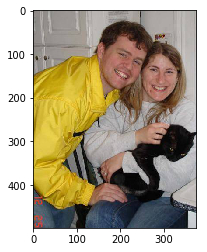

In [136]:
#plt.imshow(image.load_img("./../original_data/cat/260.jpg"))
plt.imshow(image.load_img("./../data/validation/cats/cat.10946.jpg"))

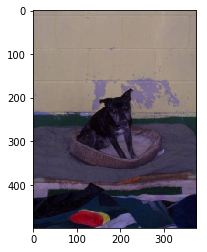

In [141]:
#plt.imshow(image.load_img("./../original_data/cat/260.jpg"))
plt.imshow(image.load_img("./../data/validation/dogs/dog.10871.jpg"))

In [ ]:
#ここから、test_dataを読んで結果のcsvを返すパート

In [ ]:
test_image_name_list = glob.glob('./' + "../test_data" + '/*.' + "jpg") 


inception_test_images = loadAllImage(dog_img_name_list, inception_preprocess_input,img_width_xception_inception,img_height_xception_inception)
xception_test_images = loadAllImage(dog_img_name_list, xception_preprocess_input,img_width_xception_inception,img_height_xception_inception)
vgg_test_images = loadAllImage(dog_img_name_list, vgg16_preprocess_input,img_width_vgg,img_height_vgg)



In [146]:
resultArray = []
for image_index in range(0, 12500):
    
    img_vgg = image.load_img("../test_data/"+str(image_index+1)+".jpg", target_size=(img_width_vgg, img_height_vgg))
    img_vgg = image.img_to_array(img_vgg)
    img_vgg = vgg16_preprocess_input(img_vgg)
    
    img_inception = image.load_img("../test_data/"+str(image_index+1)+".jpg", target_size=(img_width_xception_inception, img_height_xception_inception))
    img_inception = image.img_to_array(img_inception)
    img_inception = inception_preprocess_input(img_inception)
    
    img_xception = image.load_img("../test_data/"+str(image_index+1)+".jpg", target_size=(img_width_xception_inception, img_height_xception_inception))
    img_xception = image.img_to_array(img_xception)
    img_xception = xception_preprocess_input(img_xception)
    
    
    predictedResult_vgg= model_vgg16.predict(np.array([img_vgg]))
    predictedResult_inception = model_inception.predict(np.array([img_inception]))
    predictedResult_xception = model_xception.predict(np.array([img_xception]))
    
    dogCount = 0
    catCount = 0
    if predictedResult_vgg[0][0] > 0.5:
        dogCount += 1
    else:
        catCount += 1
        
    if predictedResult_inception[0][0] > 0.5:
        dogCount += 1
    else:
        catCount += 1
        
    if predictedResult_xception[0][0] > 0.5:
        dogCount += 1
    else:
        catCount += 1
    
    if dogCount >= 1:
        resultArray.append([image_index+1,1])
        print("dog" + "  " + str(image_index + 1))
    else:
        resultArray.append([image_index+1,0])
        print("cat" + "  " + str(image_index + 1))


        

dog  1
dog  2
dog  3
dog  4
cat  5
cat  6
cat  7
cat  8
cat  9
cat  10
cat  11
dog  12
cat  13
cat  14
cat  15
cat  16
dog  17
dog  18
cat  19
cat  20
dog  21
cat  22
dog  23
dog  24
cat  25
dog  26
dog  27
cat  28
dog  29
dog  30
dog  31
cat  32
dog  33
cat  34
cat  35
cat  36
cat  37
cat  38
dog  39
cat  40
dog  41
dog  42
dog  43
dog  44
cat  45
dog  46
cat  47
dog  48
dog  49
cat  50
cat  51
cat  52
cat  53
cat  54
cat  55
dog  56
dog  57
cat  58
dog  59
cat  60
cat  61
dog  62
cat  63
cat  64
dog  65
dog  66
dog  67
cat  68
dog  69
dog  70
dog  71
dog  72
dog  73
dog  74
cat  75
dog  76
dog  77
dog  78
dog  79
cat  80
dog  81
cat  82
dog  83
cat  84
dog  85
dog  86
dog  87
dog  88
cat  89
cat  90
cat  91
cat  92
cat  93
dog  94
dog  95
cat  96
dog  97
dog  98
cat  99
cat  100
cat  101
dog  102
cat  103
cat  104
dog  105
dog  106
cat  107
cat  108
dog  109
dog  110
dog  111
dog  112
dog  113
cat  114
cat  115
cat  116
cat  117
dog  118
dog  119
cat  120
cat  121
cat  122
cat  123
c

cat  925
cat  926
cat  927
cat  928
cat  929
dog  930
cat  931
cat  932
cat  933
dog  934
dog  935
cat  936
cat  937
cat  938
dog  939
dog  940
cat  941
cat  942
cat  943
dog  944
dog  945
dog  946
cat  947
cat  948
dog  949
dog  950
cat  951
cat  952
dog  953
cat  954
dog  955
dog  956
dog  957
dog  958
cat  959
dog  960
cat  961
dog  962
dog  963
cat  964
cat  965
dog  966
cat  967
dog  968
dog  969
dog  970
dog  971
dog  972
cat  973
dog  974
cat  975
cat  976
cat  977
cat  978
dog  979
dog  980
dog  981
dog  982
dog  983
dog  984
cat  985
cat  986
cat  987
cat  988
dog  989
cat  990
cat  991
dog  992
dog  993
cat  994
dog  995
cat  996
dog  997
dog  998
cat  999
dog  1000
cat  1001
dog  1002
dog  1003
dog  1004
cat  1005
dog  1006
dog  1007
cat  1008
dog  1009
dog  1010
cat  1011
dog  1012
cat  1013
dog  1014
cat  1015
cat  1016
cat  1017
dog  1018
dog  1019
cat  1020
cat  1021
cat  1022
cat  1023
cat  1024
cat  1025
cat  1026
cat  1027
cat  1028
cat  1029
cat  1030
cat  1031
dog  

dog  1753
cat  1754
dog  1755
cat  1756
cat  1757
dog  1758
dog  1759
cat  1760
dog  1761
dog  1762
cat  1763
dog  1764
cat  1765
dog  1766
dog  1767
dog  1768
dog  1769
cat  1770
cat  1771
cat  1772
dog  1773
cat  1774
cat  1775
dog  1776
cat  1777
cat  1778
cat  1779
cat  1780
dog  1781
dog  1782
cat  1783
cat  1784
cat  1785
dog  1786
dog  1787
dog  1788
dog  1789
dog  1790
dog  1791
cat  1792
cat  1793
dog  1794
cat  1795
cat  1796
dog  1797
cat  1798
cat  1799
dog  1800
dog  1801
cat  1802
dog  1803
cat  1804
cat  1805
cat  1806
dog  1807
cat  1808
dog  1809
dog  1810
dog  1811
cat  1812
dog  1813
dog  1814
cat  1815
dog  1816
dog  1817
cat  1818
dog  1819
cat  1820
dog  1821
cat  1822
cat  1823
cat  1824
dog  1825
cat  1826
cat  1827
dog  1828
dog  1829
cat  1830
dog  1831
dog  1832
cat  1833
cat  1834
cat  1835
cat  1836
dog  1837
dog  1838
cat  1839
dog  1840
dog  1841
dog  1842
cat  1843
cat  1844
dog  1845
dog  1846
cat  1847
dog  1848
dog  1849
dog  1850
dog  1851
cat  1852


cat  2574
dog  2575
cat  2576
dog  2577
cat  2578
dog  2579
cat  2580
dog  2581
dog  2582
dog  2583
cat  2584
cat  2585
cat  2586
cat  2587
cat  2588
dog  2589
dog  2590
cat  2591
cat  2592
cat  2593
dog  2594
cat  2595
cat  2596
cat  2597
dog  2598
dog  2599
dog  2600
dog  2601
dog  2602
cat  2603
cat  2604
dog  2605
dog  2606
cat  2607
cat  2608
dog  2609
cat  2610
cat  2611
dog  2612
dog  2613
dog  2614
cat  2615
dog  2616
dog  2617
cat  2618
cat  2619
cat  2620
cat  2621
cat  2622
cat  2623
dog  2624
cat  2625
dog  2626
dog  2627
dog  2628
dog  2629
cat  2630
cat  2631
cat  2632
cat  2633
dog  2634
dog  2635
cat  2636
cat  2637
dog  2638
cat  2639
cat  2640
dog  2641
dog  2642
dog  2643
dog  2644
dog  2645
cat  2646
cat  2647
dog  2648
cat  2649
cat  2650
dog  2651
cat  2652
cat  2653
dog  2654
cat  2655
dog  2656
cat  2657
cat  2658
dog  2659
cat  2660
dog  2661
cat  2662
dog  2663
dog  2664
cat  2665
cat  2666
cat  2667
cat  2668
cat  2669
cat  2670
dog  2671
cat  2672
dog  2673


dog  3395
dog  3396
cat  3397
cat  3398
dog  3399
dog  3400
dog  3401
cat  3402
cat  3403
cat  3404
cat  3405
cat  3406
dog  3407
dog  3408
dog  3409
dog  3410
cat  3411
dog  3412
dog  3413
dog  3414
cat  3415
dog  3416
dog  3417
cat  3418
dog  3419
dog  3420
dog  3421
dog  3422
cat  3423
dog  3424
dog  3425
dog  3426
dog  3427
cat  3428
cat  3429
dog  3430
cat  3431
dog  3432
dog  3433
dog  3434
dog  3435
dog  3436
dog  3437
cat  3438
cat  3439
cat  3440
dog  3441
dog  3442
cat  3443
cat  3444
dog  3445
dog  3446
cat  3447
cat  3448
cat  3449
cat  3450
cat  3451
dog  3452
cat  3453
dog  3454
dog  3455
cat  3456
cat  3457
cat  3458
dog  3459
cat  3460
cat  3461
cat  3462
cat  3463
dog  3464
cat  3465
cat  3466
dog  3467
dog  3468
dog  3469
dog  3470
dog  3471
cat  3472
cat  3473
cat  3474
cat  3475
cat  3476
cat  3477
dog  3478
dog  3479
cat  3480
dog  3481
dog  3482
cat  3483
dog  3484
dog  3485
dog  3486
cat  3487
dog  3488
cat  3489
dog  3490
dog  3491
cat  3492
cat  3493
dog  3494


dog  4215
dog  4216
cat  4217
dog  4218
dog  4219
cat  4220
cat  4221
cat  4222
dog  4223
dog  4224
cat  4225
cat  4226
cat  4227
cat  4228
dog  4229
dog  4230
dog  4231
cat  4232
dog  4233
dog  4234
dog  4235
cat  4236
dog  4237
dog  4238
cat  4239
dog  4240
cat  4241
dog  4242
dog  4243
cat  4244
dog  4245
dog  4246
dog  4247
dog  4248
cat  4249
cat  4250
dog  4251
dog  4252
cat  4253
cat  4254
dog  4255
cat  4256
dog  4257
dog  4258
dog  4259
dog  4260
dog  4261
cat  4262
cat  4263
dog  4264
dog  4265
cat  4266
dog  4267
dog  4268
cat  4269
cat  4270
cat  4271
dog  4272
cat  4273
dog  4274
cat  4275
dog  4276
cat  4277
cat  4278
cat  4279
cat  4280
cat  4281
dog  4282
cat  4283
cat  4284
cat  4285
cat  4286
dog  4287
cat  4288
dog  4289
dog  4290
cat  4291
cat  4292
cat  4293
dog  4294
dog  4295
cat  4296
dog  4297
cat  4298
dog  4299
dog  4300
cat  4301
dog  4302
dog  4303
dog  4304
dog  4305
cat  4306
dog  4307
cat  4308
dog  4309
cat  4310
cat  4311
cat  4312
cat  4313
dog  4314


dog  5035
dog  5036
cat  5037
cat  5038
cat  5039
dog  5040
cat  5041
cat  5042
cat  5043
cat  5044
dog  5045
dog  5046
cat  5047
dog  5048
dog  5049
cat  5050
cat  5051
dog  5052
cat  5053
cat  5054
cat  5055
dog  5056
cat  5057
cat  5058
cat  5059
dog  5060
dog  5061
dog  5062
dog  5063
dog  5064
cat  5065
dog  5066
dog  5067
dog  5068
dog  5069
dog  5070
dog  5071
dog  5072
dog  5073
cat  5074
cat  5075
cat  5076
dog  5077
dog  5078
cat  5079
dog  5080
dog  5081
cat  5082
cat  5083
cat  5084
cat  5085
dog  5086
cat  5087
cat  5088
dog  5089
dog  5090
cat  5091
dog  5092
cat  5093
dog  5094
cat  5095
dog  5096
cat  5097
dog  5098
cat  5099
dog  5100
dog  5101
cat  5102
cat  5103
cat  5104
cat  5105
cat  5106
dog  5107
cat  5108
cat  5109
cat  5110
dog  5111
cat  5112
dog  5113
dog  5114
cat  5115
dog  5116
dog  5117
dog  5118
cat  5119
dog  5120
dog  5121
cat  5122
dog  5123
cat  5124
cat  5125
cat  5126
dog  5127
dog  5128
cat  5129
dog  5130
cat  5131
cat  5132
cat  5133
cat  5134


cat  5855
cat  5856
cat  5857
dog  5858
cat  5859
dog  5860
cat  5861
dog  5862
cat  5863
dog  5864
cat  5865
cat  5866
cat  5867
cat  5868
dog  5869
cat  5870
cat  5871
cat  5872
dog  5873
dog  5874
cat  5875
cat  5876
dog  5877
dog  5878
cat  5879
dog  5880
dog  5881
dog  5882
dog  5883
dog  5884
cat  5885
dog  5886
cat  5887
cat  5888
cat  5889
dog  5890
cat  5891
dog  5892
dog  5893
cat  5894
cat  5895
cat  5896
dog  5897
dog  5898
cat  5899
cat  5900
dog  5901
cat  5902
cat  5903
dog  5904
dog  5905
cat  5906
cat  5907
dog  5908
cat  5909
cat  5910
dog  5911
cat  5912
cat  5913
cat  5914
dog  5915
dog  5916
dog  5917
cat  5918
dog  5919
cat  5920
cat  5921
dog  5922
dog  5923
dog  5924
dog  5925
cat  5926
cat  5927
dog  5928
dog  5929
dog  5930
dog  5931
cat  5932
cat  5933
cat  5934
dog  5935
dog  5936
cat  5937
dog  5938
cat  5939
cat  5940
cat  5941
cat  5942
dog  5943
dog  5944
cat  5945
dog  5946
cat  5947
dog  5948
cat  5949
cat  5950
dog  5951
dog  5952
cat  5953
cat  5954


cat  6677
cat  6678
dog  6679
cat  6680
cat  6681
cat  6682
cat  6683
cat  6684
dog  6685
cat  6686
cat  6687
dog  6688
cat  6689
cat  6690
cat  6691
cat  6692
cat  6693
cat  6694
cat  6695
cat  6696
cat  6697
cat  6698
dog  6699
dog  6700
dog  6701
cat  6702
dog  6703
dog  6704
cat  6705
cat  6706
dog  6707
dog  6708
cat  6709
dog  6710
cat  6711
dog  6712
cat  6713
cat  6714
dog  6715
dog  6716
cat  6717
dog  6718
dog  6719
dog  6720
dog  6721
dog  6722
cat  6723
cat  6724
dog  6725
cat  6726
cat  6727
dog  6728
dog  6729
cat  6730
dog  6731
dog  6732
dog  6733
dog  6734
dog  6735
cat  6736
dog  6737
dog  6738
cat  6739
cat  6740
dog  6741
dog  6742
cat  6743
cat  6744
dog  6745
cat  6746
cat  6747
cat  6748
cat  6749
cat  6750
dog  6751
cat  6752
dog  6753
dog  6754
cat  6755
cat  6756
dog  6757
cat  6758
dog  6759
cat  6760
dog  6761
cat  6762
dog  6763
cat  6764
cat  6765
dog  6766
dog  6767
cat  6768
cat  6769
cat  6770
dog  6771
dog  6772
dog  6773
dog  6774
dog  6775
cat  6776


dog  7499
dog  7500
cat  7501
dog  7502
dog  7503
dog  7504
dog  7505
cat  7506
cat  7507
cat  7508
dog  7509
dog  7510
cat  7511
cat  7512
cat  7513
dog  7514
cat  7515
dog  7516
dog  7517
dog  7518
dog  7519
dog  7520
dog  7521
cat  7522
dog  7523
dog  7524
cat  7525
dog  7526
cat  7527
dog  7528
dog  7529
dog  7530
dog  7531
cat  7532
cat  7533
dog  7534
cat  7535
dog  7536
dog  7537
dog  7538
cat  7539
cat  7540
dog  7541
dog  7542
dog  7543
dog  7544
dog  7545
dog  7546
dog  7547
dog  7548
cat  7549
dog  7550
dog  7551
dog  7552
dog  7553
dog  7554
dog  7555
cat  7556
cat  7557
dog  7558
dog  7559
dog  7560
cat  7561
dog  7562
dog  7563
dog  7564
cat  7565
cat  7566
dog  7567
cat  7568
dog  7569
cat  7570
cat  7571
dog  7572
cat  7573
dog  7574
cat  7575
cat  7576
dog  7577
dog  7578
dog  7579
dog  7580
cat  7581
dog  7582
cat  7583
dog  7584
dog  7585
cat  7586
dog  7587
cat  7588
dog  7589
dog  7590
dog  7591
cat  7592
cat  7593
dog  7594
dog  7595
dog  7596
cat  7597
cat  7598


dog  8319
cat  8320
dog  8321
cat  8322
dog  8323
dog  8324
dog  8325
dog  8326
dog  8327
cat  8328
cat  8329
cat  8330
dog  8331
dog  8332
cat  8333
cat  8334
dog  8335
cat  8336
dog  8337
cat  8338
dog  8339
cat  8340
dog  8341
dog  8342
dog  8343
dog  8344
cat  8345
dog  8346
dog  8347
cat  8348
cat  8349
dog  8350
cat  8351
cat  8352
cat  8353
cat  8354
dog  8355
cat  8356
dog  8357
dog  8358
cat  8359
dog  8360
dog  8361
dog  8362
cat  8363
dog  8364
cat  8365
cat  8366
cat  8367
cat  8368
dog  8369
cat  8370
cat  8371
cat  8372
cat  8373
cat  8374
dog  8375
cat  8376
cat  8377
dog  8378
dog  8379
dog  8380
cat  8381
dog  8382
cat  8383
dog  8384
cat  8385
cat  8386
cat  8387
dog  8388
dog  8389
dog  8390
cat  8391
dog  8392
cat  8393
dog  8394
dog  8395
dog  8396
cat  8397
dog  8398
dog  8399
cat  8400
cat  8401
cat  8402
dog  8403
cat  8404
cat  8405
cat  8406
dog  8407
cat  8408
cat  8409
cat  8410
dog  8411
dog  8412
cat  8413
dog  8414
dog  8415
dog  8416
cat  8417
cat  8418


dog  9139
dog  9140
cat  9141
cat  9142
dog  9143
dog  9144
cat  9145
cat  9146
cat  9147
dog  9148
cat  9149
cat  9150
dog  9151
cat  9152
dog  9153
cat  9154
dog  9155
cat  9156
cat  9157
dog  9158
dog  9159
cat  9160
dog  9161
dog  9162
cat  9163
dog  9164
dog  9165
cat  9166
dog  9167
dog  9168
dog  9169
dog  9170
dog  9171
cat  9172
cat  9173
dog  9174
dog  9175
cat  9176
dog  9177
cat  9178
dog  9179
cat  9180
dog  9181
cat  9182
cat  9183
dog  9184
dog  9185
cat  9186
dog  9187
dog  9188
dog  9189
dog  9190
dog  9191
cat  9192
dog  9193
cat  9194
cat  9195
cat  9196
cat  9197
cat  9198
dog  9199
dog  9200
cat  9201
dog  9202
cat  9203
dog  9204
cat  9205
dog  9206
dog  9207
cat  9208
cat  9209
cat  9210
cat  9211
dog  9212
cat  9213
dog  9214
cat  9215
cat  9216
dog  9217
dog  9218
cat  9219
cat  9220
cat  9221
dog  9222
cat  9223
dog  9224
cat  9225
cat  9226
dog  9227
cat  9228
cat  9229
dog  9230
dog  9231
cat  9232
dog  9233
dog  9234
cat  9235
cat  9236
cat  9237
dog  9238


dog  9959
dog  9960
cat  9961
dog  9962
cat  9963
cat  9964
dog  9965
cat  9966
dog  9967
dog  9968
dog  9969
dog  9970
cat  9971
cat  9972
dog  9973
cat  9974
cat  9975
dog  9976
cat  9977
cat  9978
cat  9979
cat  9980
cat  9981
dog  9982
dog  9983
dog  9984
dog  9985
dog  9986
dog  9987
dog  9988
dog  9989
dog  9990
dog  9991
dog  9992
cat  9993
cat  9994
cat  9995
dog  9996
dog  9997
cat  9998
cat  9999
dog  10000
cat  10001
cat  10002
dog  10003
dog  10004
cat  10005
cat  10006
cat  10007
cat  10008
cat  10009
dog  10010
dog  10011
cat  10012
cat  10013
cat  10014
dog  10015
cat  10016
cat  10017
cat  10018
cat  10019
cat  10020
cat  10021
dog  10022
dog  10023
dog  10024
dog  10025
dog  10026
dog  10027
cat  10028
dog  10029
dog  10030
cat  10031
cat  10032
cat  10033
dog  10034
dog  10035
dog  10036
cat  10037
dog  10038
dog  10039
cat  10040
dog  10041
dog  10042
dog  10043
cat  10044
dog  10045
dog  10046
dog  10047
dog  10048
cat  10049
cat  10050
cat  10051
cat  10052
dog  10

cat  10708
dog  10709
dog  10710
cat  10711
dog  10712
cat  10713
dog  10714
dog  10715
cat  10716
dog  10717
cat  10718
dog  10719
dog  10720
cat  10721
cat  10722
dog  10723
dog  10724
dog  10725
cat  10726
cat  10727
cat  10728
cat  10729
dog  10730
dog  10731
cat  10732
dog  10733
cat  10734
cat  10735
dog  10736
cat  10737
dog  10738
dog  10739
cat  10740
cat  10741
dog  10742
dog  10743
dog  10744
cat  10745
cat  10746
cat  10747
cat  10748
cat  10749
dog  10750
cat  10751
dog  10752
dog  10753
cat  10754
dog  10755
dog  10756
cat  10757
dog  10758
cat  10759
cat  10760
cat  10761
cat  10762
cat  10763
cat  10764
dog  10765
dog  10766
dog  10767
dog  10768
dog  10769
dog  10770
dog  10771
dog  10772
dog  10773
cat  10774
cat  10775
cat  10776
dog  10777
cat  10778
cat  10779
cat  10780
cat  10781
dog  10782
cat  10783
cat  10784
dog  10785
cat  10786
dog  10787
dog  10788
cat  10789
dog  10790
cat  10791
cat  10792
cat  10793
dog  10794
dog  10795
cat  10796
cat  10797
dog  10798

dog  11454
cat  11455
cat  11456
cat  11457
dog  11458
dog  11459
cat  11460
dog  11461
cat  11462
cat  11463
dog  11464
cat  11465
cat  11466
cat  11467
dog  11468
dog  11469
dog  11470
cat  11471
dog  11472
dog  11473
cat  11474
cat  11475
cat  11476
cat  11477
dog  11478
cat  11479
cat  11480
cat  11481
dog  11482
dog  11483
cat  11484
cat  11485
dog  11486
dog  11487
dog  11488
cat  11489
dog  11490
cat  11491
cat  11492
cat  11493
dog  11494
cat  11495
dog  11496
dog  11497
cat  11498
cat  11499
cat  11500
cat  11501
dog  11502
dog  11503
cat  11504
cat  11505
dog  11506
dog  11507
cat  11508
cat  11509
dog  11510
cat  11511
dog  11512
dog  11513
dog  11514
dog  11515
dog  11516
cat  11517
cat  11518
dog  11519
dog  11520
dog  11521
dog  11522
cat  11523
cat  11524
cat  11525
dog  11526
dog  11527
cat  11528
cat  11529
dog  11530
cat  11531
cat  11532
dog  11533
cat  11534
dog  11535
dog  11536
dog  11537
cat  11538
dog  11539
cat  11540
dog  11541
dog  11542
cat  11543
cat  11544

dog  12200
cat  12201
cat  12202
cat  12203
cat  12204
cat  12205
dog  12206
dog  12207
dog  12208
cat  12209
cat  12210
cat  12211
cat  12212
dog  12213
cat  12214
cat  12215
cat  12216
cat  12217
cat  12218
dog  12219
cat  12220
cat  12221
dog  12222
cat  12223
cat  12224
dog  12225
dog  12226
cat  12227
dog  12228
dog  12229
dog  12230
cat  12231
dog  12232
dog  12233
dog  12234
dog  12235
cat  12236
dog  12237
dog  12238
cat  12239
cat  12240
cat  12241
cat  12242
cat  12243
cat  12244
cat  12245
dog  12246
dog  12247
dog  12248
dog  12249
cat  12250
cat  12251
cat  12252
dog  12253
dog  12254
cat  12255
dog  12256
cat  12257
cat  12258
dog  12259
dog  12260
cat  12261
dog  12262
dog  12263
dog  12264
cat  12265
dog  12266
dog  12267
dog  12268
dog  12269
dog  12270
dog  12271
cat  12272
dog  12273
dog  12274
dog  12275
cat  12276
dog  12277
dog  12278
dog  12279
cat  12280
dog  12281
dog  12282
cat  12283
dog  12284
cat  12285
cat  12286
dog  12287
cat  12288
dog  12289
dog  12290

In [148]:
import csv
with open("./result.csv", 'w') as f:
    writer = csv.writer(f)
    writer.writerows(resultArray)